In [193]:
#Installing neccesary packages

#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc
%pip install python-dotenv

#Data Handling packages
%pip install pandas
%pip install numpy

#Visualiztion packages
%pip install matplotlib
%pip install seaborn

#Package for statitics 
%pip install scipy

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN

The project aim is to develop a supervised machine learning model that analyse custommer attrition in Vodafone. This model main objective is to determine  accurately whether a customer will Churn or not. 
The purpose of this project is to identify probable customer churn, offer insightful information about customer behavior and  create a  proactive customer retention initiative.
The project's output will help Vodafone deal with customer turnover in a more knowledgeable and proactive manner.


The dataset contains information about:

The dataset contains information about:

Churn : Customers who left the company

Product and services the customer signed unto :PhoneService, MultipleLines	InternetService, OnlineSecurity, DeviceProtection, TechSupport,Streaming TV	Streaming Movies

Customer Information : Contract, PaperlessBilling, PaymentMethod, MonthlyCharges	TotalCharges

Demographics: age , gender, marital status , (With dependants or without dependants)

Customer Identidication :  A distinct identification number that identifies every customer.

Senior Citizen: States if the customer is old or not.

Dependants: Shows if a customer has dependants or not, ie parenets, children.

Monthly Tenure: Shows how long the customer has been with Vodafone

Total Charges: Monthly charges * each tenure

Multiple lines : Shows if the customes have multiple telephone lines with the company.




## HYPOTHESIS

Null Hypothesis: There is no significant relationship between customers churn and the type of contract

Alternative Hypothesis:  There is a significant relationship between customers churn and the type of contract


## ANALYTICAL QUESTIONS
1.What is the overall count of customers who have discontinues their services with the company?

2.Which contract type exhibits a higher number of customers who have left company ?

3.How does the rate of customer churn change in relation to the duration of their subscription?

4.Is there a correlation between the total charge accrued by customers and the type of contract they have?

5.What are the preferred payment method?

## 1st Step :Importing the libraries

In [194]:
#Importing all necessary packages
import pyodbc

#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values

#importing data handling packages
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [195]:
#Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

#Getting the values for the credentials you set in the '.env' file
server = environment_variables.get('server_name')
database = environment_variables.get('database')
username = environment_variables.get('user')
password = environment_variables.get('password')

#Creating a connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

In [196]:
#establishing a connestion to the database using pyodbc library
connection = pyodbc.connect(connection_string)

## 2nd Step: Loading the datasets

In [197]:
#retrieving the data from database
query = 'Select * From dbo.LP2_Telco_churn_first_3000'
data_1 = pd.read_sql(query,connection)

In [198]:
data_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [199]:
#retrieving the second dataset from the github repository
data_2=pd.read_csv('LP2_Telco-churn-seconddd-2000.csv')
data_2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [200]:
#retrieving the third dataset(testing dataset) from OneDrive
data_3=pd.read_csv('Telcooo-churn-last-2000.csv')
data_3.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


EDA FOR DATA_1

In [201]:
data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [202]:
data_1.shape

(3000, 21)

In [203]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [204]:
#checking for duplicate: no duplicate values
data_1[data_1.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [205]:
data_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [206]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [207]:
#0 means the customer has been with the company for less than one month
data_1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [208]:
data_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [209]:
categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for column in categorical_columns:
    data_1[column].fillna(data_1[column].mode()[0], inplace=True)

In [210]:
data_1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64

In [212]:
data_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [226]:
#Since the unique vales of the Churn	 column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['Churn'] = data_1['Churn'].replace(mapping)
data_1['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [224]:
#Since the unique vales of the PaperlessBilling	 column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['PaperlessBilling'] = data_1['PaperlessBilling'].replace(mapping)
data_1['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [223]:
#Since the unique vales of the StreamingMovies column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['StreamingMovies'] = data_1['StreamingMovies'].replace(mapping)
data_1['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [222]:
#Since the unique vales of the StreamingTV column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['StreamingTV'] = data_1['StreamingTV'].replace(mapping)
data_1['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [221]:
#Since the unique vales of the TechSupport column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['TechSupport'] = data_1['TechSupport'].replace(mapping)
data_1['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [220]:
#Since the unique vales of the DeviceProtection column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['DeviceProtection'] = data_1['DeviceProtection'].replace(mapping)
data_1['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [219]:
#Since the unique vales of the OnlineSecurity column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['OnlineSecurity'] = data_1['OnlineSecurity'].replace(mapping)
data_1['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [218]:
#Since the unique vales of the InternetService column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['InternetService'] = data_1['InternetService'].replace(mapping)
data_1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [217]:
#Since the unique vales of the MultipleLines column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['MultipleLines'] = data_1['MultipleLines'].replace(mapping)
data_1['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [216]:
#Since the unique vales of the PhoneService = data_1['PhoneService'].replace(mapping)
 column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['PhoneService'] = data_1['PhoneService'].replace(mapping)
data_1['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [215]:
#Since the unique vales of the Dependents column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['Dependents'] = data_1['Dependents'].replace(mapping)
data_1['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [234]:
#Since the unique vales of the SeniorCitizen column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 1,False: 0}
 
# Replacing values based on assumptions
data_1['SeniorCitizen'] = data_1['SeniorCitizen'].replace(mapping)
data_1['SeniorCitizen'].unique()



array([0, 1], dtype=int64)

In [237]:
#Since the unique vales of the OnlineBackup column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['OnlineBackup'] = data_1['OnlineBackup'].replace(mapping)
data_1['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [238]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [239]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


EDA FOR DATA_2

In [240]:
data_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [229]:
data_2.shape

(2043, 21)

In [241]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [242]:
data_2[data_2.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [243]:
data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [244]:
#changing the total charge data type from object to float
data_2['TotalCharges']=pd.to_numeric(data_2['TotalCharges'], errors='coerce').astype('float')

In [245]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


## Concatenating Data_1 and Data_2

In [246]:
final_df=pd.concat([data_1,data_2],axis=0,ignore_index=True)

In [247]:
final_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [248]:
final_df.shape

(5043, 21)

In [249]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Answering the analytical questions

1.What is the overall count of customers who have discontinues their services with the company?

2.Which contract type exhibits a higher number of customers who have left company ?

3.How does the rate of customer churn change in relation to the duration of their subscription?

4.Is there a correlation between the total charge accrued by customers and the type of contract they have?

5.What are the preferred payment method?

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

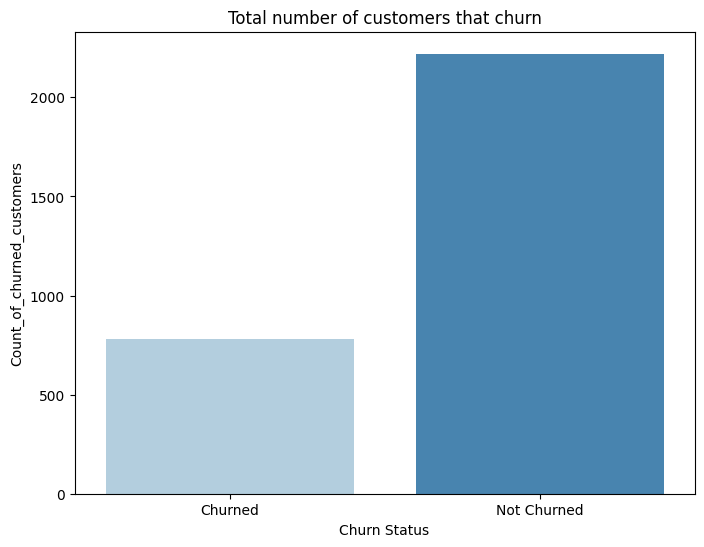

In [ ]:
#1.What is the overall count of customers who have discontinues their services with the company?
count_of_churn_customers = data_1['Churn'].sum()
count_of_churn_customers

plt.figure(figsize=(8,6))
sns.barplot(x=['Churned','Not Churned'], y = [count_of_churn_customers, len(data_1)-count_of_churn_customers],palette='Blues')
plt.title('Total number of customers that churn')
plt.xlabel('Churn Status')
plt.ylabel('Count_of_churned_customers')
plt.show()


In [ ]:
#.Which contract type exhibits a higher number of customers who have left company ?


<Figure size 1000x800 with 0 Axes>

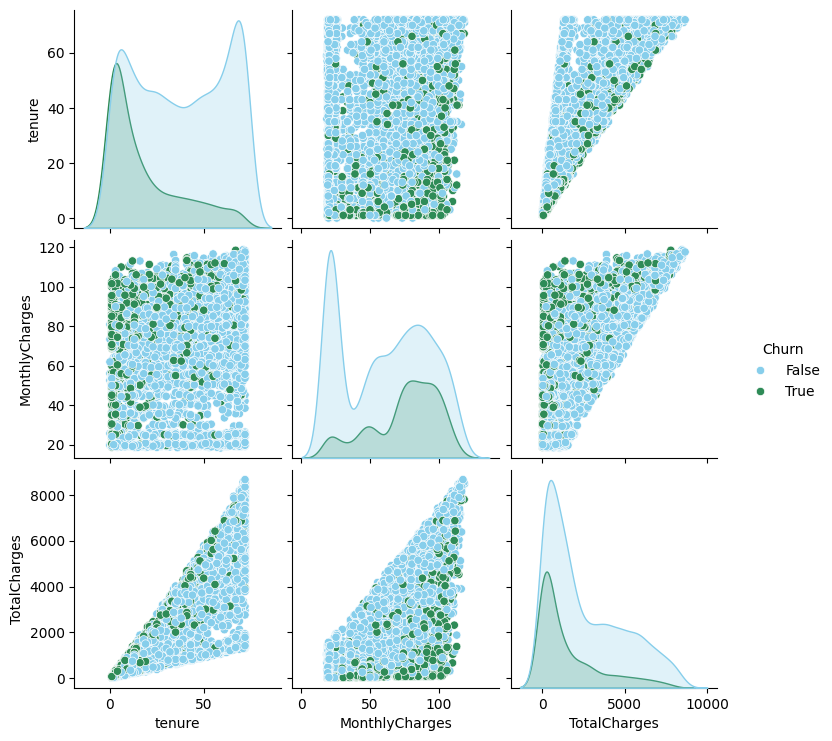

In [ ]:
data= final_df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette={True:'seagreen', False:'skyblue'}, hue = 'Churn')
plt.show()

#True': 'seagreen', 'False': 'skyblue'
#True: 'coral', False: 'steelblue'

In [ ]:
final_df['Churn']

0       False
1       False
2        True
3       False
4        True
        ...  
5038    False
5039    False
5040    False
5041     True
5042    False
Name: Churn, Length: 5043, dtype: bool

## Data Preparation

In [250]:
#spliting the data into input(X) and target (Y) features
X = final_df.drop('Churn',axis=1)

In [251]:
y=final_df['Churn']

In [252]:

#ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


#utilities
import warnings
warnings.filterwarnings('ignore')

In [253]:
print(y.unique())  # Check the unique values in your target variable


['No' 'Yes' None]


In [254]:
final_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [257]:
final_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

In [261]:
final_df['Churn'].fillna(final_df['Churn'].mode()[0], inplace=True)

In [262]:
final_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [263]:
#Splitting the data to training and evaluation

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Engineering

In [264]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [265]:
numeric_columns=X.select_dtypes(include='number').columns
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [266]:
categorical_columns=X.select_dtypes(include='object').columns
categorical_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Creating the Pipelines

In [267]:
#importing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [268]:
class LogTransformer():
    def __init__(self, constant=0.00050):
        self.constant = constant
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X + self.constant)

Machine learning pipeline

In [269]:
numeric_pipeline = Pipeline(steps=[
    ('numeric_Imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
])


categorical_pipeline = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])


preprocessor=ColumnTransformer([
    ('numeric_pipeline', numeric_pipeline, numeric_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns),
])








## Label Encoding

In [270]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Machine Learning Models

In [275]:
# training a logistic regression model
 
# Create a full pipeline including numerical transformation and Logistic Regression model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
   
])
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000027D2039BE90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [272]:
KNN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

KNN_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000027D2039BE90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [273]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000027D2039BE90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [274]:
#train an SVM model
 
SVM_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
   
])
# Fit the pipeline on the training data
SVM_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000027D2039BE90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC())])